# Groundwater Modelling in Python - Session 3

<img src="figs/part_of_cover_bakker_post.png" width="800px"> 

In [1]:
# Before starting we need to import NumPy and Matplotlib and set some defaults
import numpy as np
import matplotlib.pyplot as plt
# and set some parameters to make the figures look good
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot
plt.rcParams["figure.figsize"] = (9, 4) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rc('font', size=12)

Sections and Exercises with a star are additional material that is not covered in detail during the workshop.

# Introduction to two-dimensional flow
The discharge vector for two-dimensional flow in a horizontal plane consists of two components: $Q_x$ in the $x$-direction and $Q_y$ in the $y$-direction. Continuity of flow for steady two-dimensional flow in the horizontal $x, y$ plane may be written as 
\begin{equation}\label{basicdeq2d}
\frac{\partial Q_x}{\partial x} + \frac{\partial Q_y}{\partial y} = N
\end{equation}
where $N$ is the areal recharge. 
Note that this equation differs from the continuity of flow equation for one-dimensional steady flow only by the additional term $\partial Q_y / \partial y$. 

Steady confined and unconfined flow may be formulated as potential flow, where the discharge vector is minus the gradient of the discharge potential
\begin{equation}\label{QxQychap6}
Q_x = -\frac{\partial \Phi}{\partial x} \quad\quad Q_y = -\frac{\partial \Phi}{\partial y}
\end{equation}
so that the differential equation for steady potential flow becomes the two-dimensional Poisson equation
\begin{equation}\label{poisson2d}
\nabla^2 \Phi = \frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2} = -N
\end{equation}
In absence of areal recharge ($N=0$), this differential equation is referred to as the two-dimensional Laplace equation.

The relationship between the discharge potential and head for the different flow types is summarized as follows:

\begin{equation}\label{potential_table}
\begin{array}{|c|cc|}
\hline
\text{Flow type} & \text{Discharge potential} & \text{Condition}\\
\hline
\text{confined} & \Phi = kHh & h \ge z_t \\
\hline
\text{unconfined} & \Phi = \tfrac{1}{2}k(h-z_b)^2 & h \ge z_b \\
\hline
\text{unconfined/confined} & \Phi = kHh -(\tfrac{1}{2}kH^2 + kHz_b) & h \ge z_t \\
\text{flow} & \Phi = \tfrac{1}{2}k(h-z_b)^2 & z_b \le h \le z_t \\
\hline
\end{array}
\end{equation}

where $k$ is the hydraulic conductivity of the aquifer, $z_b$ and $z_t$ are the elevations of the bottom and top of the aquifer, and $H$ is the aquifer thickness.

# Solution 1. Flow to a pumping well on an island with infiltration

Consider a pumping well with discharge $Q$ at the center of a circular island of radius $R$. The aquifer is unconfined with hydraulic conductivity $k$ and base elevation $z_b$. The water level is fixed at the edge of the island to $h_R$. The recharge on the island is uniform and equal to $N$. Note that the discharge $Q$ is positive when the well is pumping water out of the aquifer and the recharge $N$ is positive when water is entering the aquifer. 

<img src="figs/merged_nbs6_17_0.png" width="400px"> 

The solution for the discharge potential is
\begin{equation} \label{phi3}
\Phi = -\frac{1}{4}N (r^2-R^2) + \frac{Q}{4\pi} \ln{(r^2/R^2)}
+\Phi_R
\end{equation}
where $\Phi_R=\tfrac{1}{2} k  (h_R - z_b)^2$

The head in the aquifer is computed from the discharge potential as
\begin{equation}
h = z_b + \sqrt{\frac{2\Phi}{k}}
\end{equation}

As a first example, the discharge of the well is half the total recharge on the island 
$Q = N \pi R^2 / 2$. The head in the well is equal to the head at $r=r_w$, where $r_w$ is the radius of the well. 

In [2]:
# parameters
k = 5 # hydraulic conductivity, m/d
zb = 0 # bottom elevation of aquifer, m
N = 0.001 # areal recharge, m/d
R = 200 # radius of the island, m
hR = 10  # head at edge of island, m
rw = 0.3 # well radius, m
Q = 0.5 * N * np.pi * R ** 2  # discharge is half total recharge, m^3/d
print(f'Discharge of well: {Q:.2f} m^3/d')

Discharge of well: 62.83 m^3/d


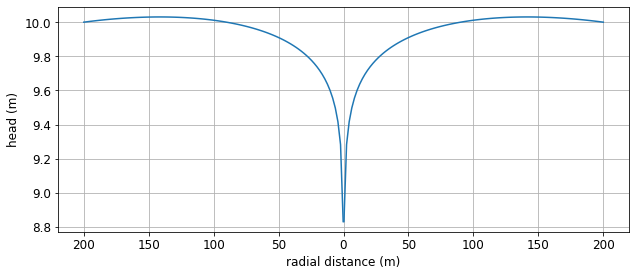

In [3]:
# solution
r = np.linspace(rw, R, 100)
phiR = 0.5 * k * (hR - zb) ** 2
phi = -N / 4 * (r ** 2 - R ** 2) + Q / (4 * np.pi) * np.log(r ** 2 / R ** 2) + phiR
h = zb + np.sqrt(2 * phi / k)
# plot
plt.plot(r, h, 'C0')
plt.plot(-r, h, 'C0')
plt.xlabel('radial distance (m)')
plt.ylabel('head (m)')
plt.xticks(np.arange(-200, 201, 50), np.abs(np.arange(-200, 201, 50))) # positive r ticks
plt.grid()

## Exercise 1.1
Compute the head in the well when the discharge is equal to half the total recharge on the island and when the discharge is equal to exactly the total recharge on the island. Plot the head vs. $r$ for both cases in one graph. Also include the case that $Q=0$. 

In [ ]:
# Type your code here

## Exercise 1.2$^*$
What is the (theoretically) maximum discharge of the well? What happens when you try to compute the head in the well when the discharge is larger than the maximum discharge?

In [ ]:
# Type your code here

# Solution 2. A pumping well near a river

A well is located near a long and straight river running North-South along the $y$-axis. The well is located on the left side of the river at $(x_w,y_w)$ and has a discharge $Q$ (see Figure). The river is in full hydraulic contact with the aquifer so that the head in the aquifer is equal to the river stage $h_0$ along the river. The aquifer is unconfined, but the variation of the saturated thickness is neglected: the transmissivity of the aquifer is approximated as constant and equal to $T$. Far away from the well, the head in the aquifer is equal to $h_0$. 

<img src="figs/wellriver.png" width="350px"> 

The solution for the head and flow in the aquifer are obtained with the method of images as:

\begin{equation}
h = \frac{Q}{4\pi T}\ln\left[\frac{(x-x_w)^2 + (y-y_w)^2}{(x+x_w)^2 + (y-y_w)^2}\right] + h_0
\end{equation}

\begin{equation}
Q_x = -T\frac{\partial h}{\partial x} = -\frac{Q}{2\pi}\left[\frac{x-x_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{x+x_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}
\begin{equation}
Q_y = -T\frac{\partial h}{\partial y} = -\frac{Q}{2\pi}\left[\frac{y-y_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{y-y_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}

In [7]:
def head(x, y, xw, yw, Q, T, h0):
    h = Q / (4 * np.pi * T) * np.log(
    ((x - xw) ** 2 + (y - yw) ** 2) /
    ((x + xw) ** 2 + (y - yw) ** 2)) + h0
    return h

def QxQy(x, y, xw, yw, Q):
    r1sq = (x - xw) ** 2 + (y - yw) ** 2
    r2sq = (x + xw) ** 2 + (y - yw) ** 2
    Qx = -Q / (2 * np.pi) * ((x - xw) / r1sq - (x + xw) / r2sq)
    Qy = -Q / (2 * np.pi) * ((y - yw) / r1sq - (y - yw) / r2sq)
    return np.array([Qx, Qy])

An example is provided below.

In [8]:
# parameters
k = 10 # hydraulic conductivity, m/d
H = 20 # m
xw = -50 # x-location of well, m
yw = 0 # y-location of well, m
Q = 800 # discharge of well, m^3/d
rw = 0.3 # radius of well, m
h0 = 20 # river level, m
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d

The head is computed on a grid of 100 by 100 points where $x$ varies from $-100$ to $0$ and $y$ varies from $-50$ to $+50$. 

In [9]:
xg, yg = np.meshgrid(np.linspace(-100, 0, 100), np.linspace(-50, 50, 100))
h = head(xg, yg, xw, yw, Q, T, h0)
print(f'min and max head in model window: {h.min():.1f} m, {h.max():.1f} m')

min and max head in model window: 16.9 m, 20.0 m


The head is contoured as follows. First, a figure is created with the `subplot` command. The first argument is `121`, which means a figure with 1 row of graphs, 2 colulmns of graphs, and start with graph 1 (the left graph; the rigth graph will be created in the next code block). The keyword `aspect=1` is important, as it makes the scale along the $x$ and $y$ axes equal, so that a circle looks like a circle rather than an ellipse.  The `contour` function returns a contour set, which is stored in the variable `cs`. Labels are placed along the contours by passing `cs` to the `clabel` function. The format of the labels is defined ast `'%1.1f'`, wich stands for a float with 1 decimal place.

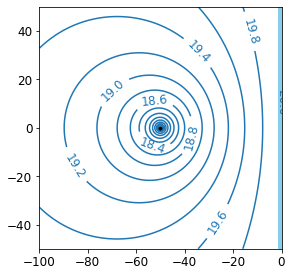

In [10]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, levels=np.arange(15, 21, 0.2), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.') # black dot for  well
plt.axvline(0, color='skyblue', lw=8); # blue line for river

The flow field is visualized using the `streamplot` function. First, $Q_x$ and $Q_y$ are computed on the same grid as used for the head. Then the `streamplot` function is used; the `density` keyword is set to control the density of streamlines. 

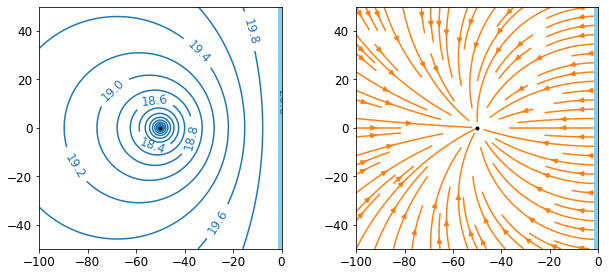

In [11]:
Qx, Qy = QxQy(xg, yg, xw, yw, Q)
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(15, 21, 0.2), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.') # black dot at location of well
plt.axvline(0, color='skyblue', lw=8); # blue line for river
#
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy, color='C1', density=0.9)
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

Alternatively, the `streamplot` function may be used to start a number of streamlines from specified starting points. In the code cell below, 20 starting points are defined, equally distributed along the circumference of the well. Note that streamlines are integrated in both directions from the starting points (with the flow and against the flow) by default. 

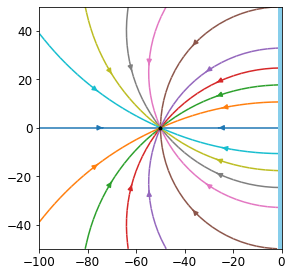

In [12]:
plt.subplot(121, aspect=1)
xstart = xw + rw * np.cos(np.arange(0, 2 * np.pi, 2 * np.pi / 20))
ystart = yw + rw * np.sin(np.arange(0, 2 * np.pi, 2 * np.pi / 20))
plt.subplot(111, aspect=1)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])])
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

## Travel time from the river to the well
The travel time may be computed through integration of the velocity vector along a streamline. This is somewhat complicated, as most strealines are curved. It is straighforward, however, for the straight streamline starting at $(x,y)=(0,0)$ (recall that $y_w=0$) on the river and flowing towards the well. This travel time represents the shortest travel time from the river to the well, which is important to assess the vulnerability of the well to possible contamination by pathogens and harmful chemicals in the river water.  

\begin{equation}
v_x = \frac{Q_x}{nH} = \frac{\text{d}x}{\text{d}t}
\end{equation}

\begin{equation}
t = \int_{a}^{b}\frac{\text{d}x}{v_x}
\end{equation}

The integral may computed numerically, for example use the `quad` function.

In [13]:
def integrand(x, y, xw, yw, Q, H=10, n=0.3):
    Qx, Qy = QxQy(x, y, xw, yw, Q)
    vx = Qx / (n * H)
    return 1 / vx

In [14]:
from scipy.integrate import quad
traveltime = quad(integrand, a=0, b=xw + rw, args=(yw, xw, yw, Q))[0]
print(f'shortest travel time from river to well: {traveltime:.1f} d')

shortest travel time from river to well: 19.6 d


## Exercise 2.1
Move the well farther away from the river such that the shortest travel time from the river to the well is at least 40 days. 

In [55]:
# Type your code here

## Exercise 2.2$^*$
Compute the head at the well at the new location (computed in Exercise 2.1) and compare it to the head at the well when it was located at the original location ($x_w=-50$). 

In [56]:
# Type your code here

## Multiple wells
The solution for multiple wells may be obtained through superposition. For example, consider two wells located on the western side of a long and straight river running North-South along the $y$-axis. The first well has discharge $Q_0$ and is located at $(x_0,y_0)$. The second well has discharge $Q_1$ and is located at $(x_1,y_1)$. The solution is
\begin{equation}
h = \frac{Q_0}{4\pi T}\ln\left[\frac{(x-x_0)^2 + (y-y_0)^2}{(x+x_0)^2 + (y-y_0)^2}\right] + \frac{Q_1}{4\pi T}\ln\left[\frac{(x-x_1)^2 + (y-y_1)^2}{(x+x_1)^2 + (y-y_1)^2}\right] + h_0
\end{equation}
The radius of both wells is $r_w$. 
The head is contoured and a streamplot is created in the code cell below for a doublet, an extraction and injection well with equal but opposite discharge (i.e., $Q_1=-Q_0$). Use is made of the `head` function defined previously. Note that part of the injected water flows to the river and part of the extracted water comes from the river. 

In [17]:
# additional parameters
Q0 = 800 # discharge of well, m^3/d
x0 = -100 # m
y0 = 50 # m
Q1 = -Q0
x1 = -100 # m
y1 = -50 # m

In [18]:
xg, yg = np.meshgrid(np.linspace(-200, 0, 100), np.linspace(-100, 100, 100))
h = head(xg, yg, x0, y0, Q0, T, 0) + head(xg, yg, x1, y1, Q1, T, 0) + h0
print(f'min and max head in model window: {h.min():.1f}, {h.max():.1f} m')
Qx, Qy = QxQy(xg, yg, x0, y0, Q0) + QxQy(xg, yg, x1, y1, Q1)

min and max head in model window: 17.2, 22.8 m


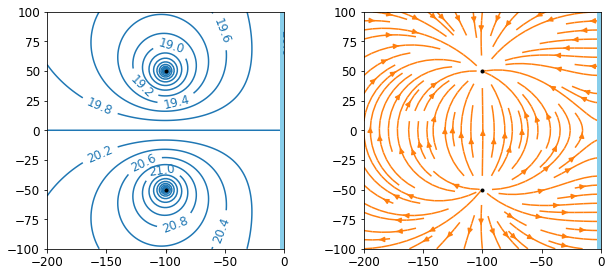

In [19]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(17, 23, 0.2), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot([x0, x1], [y0, y1], 'k.')
plt.axvline(0, color='skyblue', lw=8)
#
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy, color='C1', density=0.9) # density of streamlines
plt.plot([x0, x1], [y0, y1], 'k.')
plt.axvline(0, color='skyblue', lw=8);

## Exercise 2.3$^*$
Compute the head at the extraction well and the head at the injection well for the above case of a doublet near a river.

In [57]:
# Type your code here

# Solution 3. A pumping well near a river in uniform background flow

In virtually all aquifers, the natural groundwater flow is towards a stream, river, lake, or ocean. This flow is also called the background flow, as it is present prior to the installation of a well. The background flow may be estimated, e.g., from the heads in two observation wells. For example, the flow in the $x$-direction may be obtained from two observation wells aligned in the $x$-direction as
\begin{equation}
U\approx T\frac{\Delta h}{\Delta x}
\end{equation}
where $\Delta h$ is the head drop between the observation wells and $\Delta x$ is the distance between the two observation wells. 

Here, we are considering a pumping well near a long and straight river running North-South (as in the previous solution), but now with a uniform background flow towards the river (i.e., in the $x$-direction), as shown in the figure.

<img src="figs/wellriveruflow.png" width="350px">

The solution for the head in the aquifer is obtained from the previous solution by adding a uniform flow term in the $x$-direction. The solutions for the head and flow are

\begin{equation}
h = \frac{Q}{4\pi T}\ln\left[\frac{(x-x_w)^2 + (y-y_w)^2}{(x+x_w)^2 + (y-y_w)^2}\right] 
-\frac{U}{T}x + h_0
\end{equation}

\begin{equation}
Q_x = -\frac{Q}{2\pi}\left[\frac{x-x_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{x+x_w}{(x+x_w)^2 + (y-y_w)^2} \right] + U
\end{equation}
\begin{equation}
Q_y = -\frac{Q}{2\pi}\left[\frac{y-y_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{y-y_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}

Consider a well in a uniform background flow near a river. The well is a bit further from the river and has a somewhat smaller discharge than in the previous example.

In [21]:
# parameters
k = 20 # hydraulic conductivity, m/d
H = 10 # m
xw = -200 # x-location of well, m
yw = 0 # y-location of well, m
Q = 200 # discharge of well, m^3/d
rw = 0.3 # radius of well, m
h0 = 20 # river level, m
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d

In [22]:
# parameters uniform background flow
delx = 1000 # distance between observation wells
delh = 2 # head drop between observation wells
U = T * delh / delx
print(f'Uniform flow U = {U:.1f} m^2/d')

Uniform flow U = 0.4 m^2/d


In [23]:
def head(x, y, xw, yw, Q, T, h0, U=0):
    h = Q / (4 * np.pi * T) * np.log(
    ((x - xw) ** 2 + (y - yw) ** 2) /
    ((x + xw) ** 2 + (y - yw) ** 2)) -U * x / T + h0
    return h

def QxQy(x, y, xw, yw, Q, U=0):
    r1sq = (x - xw) ** 2 + (y - yw) ** 2
    r2sq = (x + xw) ** 2 + (y - yw) ** 2
    Qx = -Q / (2 * np.pi) * ((x - xw) / r1sq - (x + xw) / r2sq) + U
    Qy = -Q / (2 * np.pi) * ((y - yw) / r1sq - (y - yw) / r2sq)
    return Qx, Qy

The head is contoured and a streamplot is created. 20 streamlines are started from $x=-600$ m, equally distribute between $y=-300$ and $y=+300$.

In [24]:
xg, yg = np.meshgrid(np.linspace(-600, 0, 100), np.linspace(-300, 300, 100))
h = head(xg, yg, xw, yw, Q, T, h0, U)
print(f'min and max head in window: {h.min():.1f} m, {h.max():.1f} m')
Qx, Qy = QxQy(xg, yg, xw, yw, Q, U)

min and max head in window: 19.6 m, 21.1 m


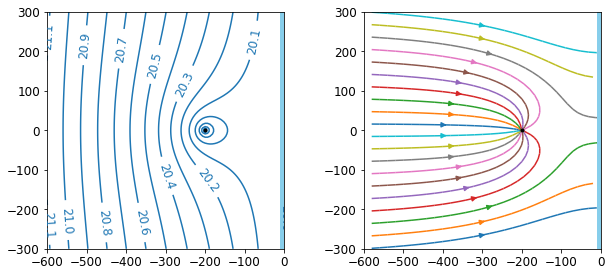

In [25]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(19, 22, 0.1), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
#
plt.subplot(122, aspect=1)
xstart = -600 * np.ones(20)
ystart = np.linspace(-300, 300, 20)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='forward')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

There appears to be a stagnation point (a point with zero velocity) between the well and the river. This point may be found by setting $Q_x=0$ along the line $y=y_w$ and solving for $x$, which gives the location $x_s$ of the stagnation point:
\begin{equation}
x_s = -\sqrt{x_w^2 + \frac{Qx_w}{\pi U}}
\end{equation}
Two streamlines are started from the stagnation point, one just above the stagnation point and one just below the stagnation point. The streamlines are integrated `backward`, so against the flow. These two streamlines bound the capture zone envelope, the area of the aquifer that is (eventually) captured by the well. Note that far upstream the width of the capture zone envelope is $W=Q/U$.

width of capture zone envelope far upstream: 500.0 m


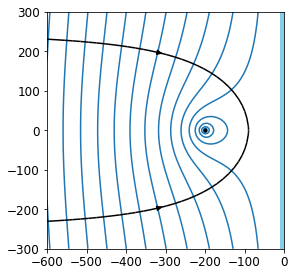

In [26]:
xs = -np.sqrt(xw ** 2 + Q * xw / (np.pi * U))
plt.subplot(121, aspect=1)
plt.contour(xg, yg, h, np.arange(19, 22, 0.1), colors='C0')
for ystart in [0.1, -0.1]:
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xs, ystart)], 
                   integration_direction='backward', color='k')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
print(f'width of capture zone envelope far upstream: {Q / U:.1f} m')

### Exercise 3.1
Consider a well located in a uniform flow field near a river running North-South, as in the previous example. Near the well is a contaminated area as shown in the figure below (run the code cell). For the current discharge of the well ($Q=200$ m$^3$/d), the well captures water from the contaminated area, as can be seen by starting a streampath from the corner of the contaminated area. The discharge of the well must be decreased such that it doesn't capture water from the contaminated area. Determine the maximum discharge of the well such that the well doesn't capture water from the contaminated area.

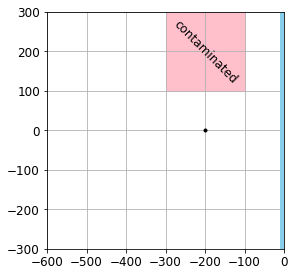

In [32]:
# run this code cell to see the contaminated area
Q = 200
Qx, Qy = QxQy(xg, yg, xw, yw, Q, U)
plt.subplot(121, aspect=1)
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
plt.fill([-300, -100, -100, -300], [100, 100, 300, 300], color='pink')
plt.text(-200, 200, 'contaminated', ha='center', va='center', rotation=-45)
plt.xlim(-600, 0)
plt.ylim(-300, 300)
plt.grid()

In [58]:
# Type your code here

### Maximum discharge before capturing river water
When the discharge of the well is large, there is no stagnation point between the well and the river. This can be seen from the equation for the stagnation point, as the term under the square root sign becomes negative (recall that $x_w$ is negative). The maximum discharge of the well such that it extracts no river water is when the stagnation point is exactly on the river and $x_s=0$. This gives for the maximum discharge 
\begin{equation}
Q_\text{max}=-\pi U x_w
\end{equation}
The maximum discharge is computed below and the capture zone envelope is plotted. Note that the capture zone envelope touches the river. 

In [34]:
Qmax = -np.pi * U * xw
print(f'maximum discharge: {Qmax:.1f} m^3/d')

maximum discharge: 251.3 m^3/d


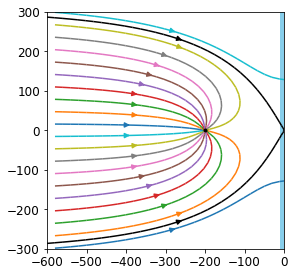

In [35]:
# compute grid of Qx, Qy
xg, yg = np.meshgrid(np.linspace(-600, 0, 100), np.linspace(-300, 300, 100))
Qx, Qy = QxQy(xg, yg, xw, yw, Qmax, U)
# plot streamlines
plt.subplot(121, aspect=1)
plt.axvline(0, color='skyblue', lw=8) # river
xstart = -600 * np.ones(20)
ystart = np.linspace(-300, 300, 20)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='forward')
# capture zone envelope
for y in [-0.1, 0.1]:
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(0, y)], 
                   integration_direction='backward', color='k')
plt.plot(xw, yw, 'k.');

### Exercise 3.2
Create a streamline plot for the case that the well discharge is $Q=300$ m$^3$/d. Start 20 streamlines at $x=-600$ m for $y$ varying from -300 to +300 m (as in the previous example). Next, add 20 streamlines that start at the river at $x=0$ and $y$ varying from -300 to +300 m. Some of the streamlines that start at the river will flow towards the well. 

In [ ]:
# compute grid of Qx, Qy
Q = 300
xg, yg = np.meshgrid(np.linspace(-600, 0, 100), np.linspace(-300, 300, 100))
Qx, Qy = QxQy(xg, yg, xw, yw, Q, U)
# plot streamlines
plt.subplot(111, aspect=1)
plt.axvline(0, color='skyblue', lw=8) # river
plt.plot(xw, yw, 'k.')
# Add your code below


### Capture zone when $Q>Q_\text{max}$$^*$
When the discharge of the well is larger than $Q_\text{max}$, there are two stagnation points on the river. Between the stagnation points, water from the river flows towards the well. The locations of the stagnation points may be computed from:
\begin{equation}
y_s = y_w \pm \sqrt{\frac{-Qx_w}{\pi U} - x_w^2}
\end{equation}
A streamplot is shown for the case that $Q=300$ m$^3$/d, including the capture zone envelope.

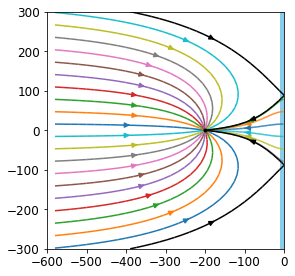

In [37]:
# compute grid of Qx, Qy
Q = 300
xg, yg = np.meshgrid(np.linspace(-600, 0, 100), np.linspace(-300, 300, 100))
Qx, Qy = QxQy(xg, yg, xw, yw, Q, U)
ys = yw + np.sqrt(-Q * xw / (np.pi * U) - xw ** 2)
# plot streamlines
plt.subplot(121, aspect=1)
plt.axvline(0, color='skyblue', lw=8) # river
xstart = -600 * np.ones(20)
ystart = np.linspace(-300, 300, 20)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='forward')
xstart = 0 * np.ones(20)
ystart = np.linspace(-300, 300, 20)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='forward', density=10)
for y in [ys + 0.1, ys - 0.1, -ys + 0.1, -ys - 0.1]:
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(0, y)], color='k')
plt.plot(xw, yw, 'k.');

# Solution 4. Wells and rivers - the analytic element method

Pumping wells form an important part of groundwater models. The principle of superposition allows for the solution of problems with an arbitrary number of wells. The organization of solutions with multiple wells becomes cumbersome when the number of wells grows. The analytic element method is a modeling technique that facilitates the superposition of many solutions, including wells. 

The analytic element method is based on the superposition of analytic solutions. Each analytic solution represents a feature in the aquifer and has at least one free parameter. For example, the solution for a pumping well is an analytic element and the free parameter is the discharge of the well. The free parameter of an analytic element may either be specified or computed from specified conditions. For example, the discharge of a well may be computed from the head specified at the well (really, at the well radius). All unknown free parameters in a model are computed simultaneously as, e.g., the discharge of one well may effect the head at another well and vice versa. 

Here we use a relatively simple analytic element model that includes wells and stream segments. The analytic element code is included in the file `simple_aem.py` (a more sophisticated code written in Python is <A href="https://github.com/mbakker7/ttim">TTIM</A>). As an example, we compute heads in an aquifer with three pumping wells as shown in the figure. In addition, the head is specified at one point called the reference point. 

In [38]:
T = 200 # transmissivity, m^2/d
x0, y0, Q0 = 0, 0, 400 # well 0
x1, y1, Q1 = 200, 50, 600 # well 1
x2, y2, Q2 = 100, 100, 200 # well 3
rw = 0.3 # radius of the wells
xr, yr, hr = 0, 200, 20 # head at reference point

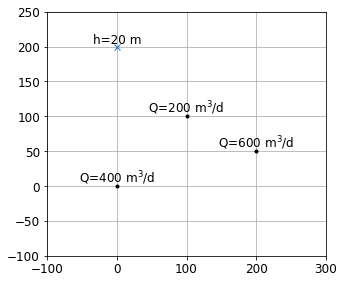

In [39]:
plt.subplot(121, aspect=1)
plt.plot([x0, x1, x2], [y0, y1, y2], 'k.')
plt.text(x0, y0, f'Q={Q0} m$^3$/d', ha='center', va='bottom')
plt.text(x1, y1, f'Q={Q1} m$^3$/d', ha='center', va='bottom')
plt.text(x2, y2, f'Q={Q2} m$^3$/d', ha='center', va='bottom')
plt.plot(xr, yr, 'x')
plt.text(xr, yr, f'h={hr} m', ha='center', va='bottom')
plt.grid()
plt.xlim(-100, 300)
plt.ylim(-100, 250);

An analytic element is created as follows. First, the `Model`, `Well` and `Constant` classes are imported from the `simple_aem` class. Next, a model is created by specifying the transmissivity of the aquifer. The `Model` class returns a `Model` object, which is stored in the variable `ml` here (you can use any name you like). Next, an arbitratry number of `Well` elements may be added to the model. Finally, the head may be specified at one point with the `Constant` element. After all elements are added to the model, the model is solved and all unknown parameters are computed (in this example only the constant in the solution). 

In [40]:
!wget https://raw.githubusercontent.com/vincentpost/gwmodelling/main/simple_aem.py
from simple_aem import Model, Well, Constant
ml = Model(T)
Well(ml, x0, y0, Q0, rw) # add well to model called ml
Well(ml, x1, y1, Q1, rw)
Well(ml, x2, y2, Q2, rw)
Constant(ml, xr, yr, hr)
ml.solve() # solve for unknowns in the model

The head may now be computed at any location with the `ml.head` function. 

In [41]:
ml.head(100, 0) # head at (0, 0)

19.339980500764106

In [42]:
ml.head(0, 0) # head at well 0, automatically evaluated at well radius

17.838186620495662

A contour plot may be created, as before, by computing the head on a grid of points and using the `contour` routine

In [43]:
xg, yg, = np.meshgrid(np.linspace(-100, 300, 100), np.linspace(-100, 200, 100))
h = ml.head(xg, yg)
print(f'min and max head: {h.min():.2f} m, {h.max():.2f} m')

min and max head: 17.62 m, 20.25 m


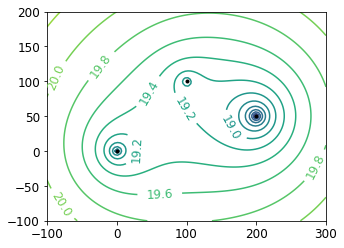

In [44]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(17, 21, 0.2))
plt.clabel(cs, fmt='%1.1f')
plt.plot([x0, x1, x2], [y0, y1, y2], 'k.');

## Exercise 4.1
Add a well to the model at $(x,y)=(100, 0)$. Determine the discharge of the well such that the head at the well is 18 m using trial and error. 

In [60]:
# Type your code here

## Wells with fixed head but unknown discharge
In the previous example, the discharges of the wells were specified. What now if you are asked to pump the wells such that the head at each of the three wells is a specified value, for example 17 m? You can do that with the `HeadWell` element. For the `HeadWell` element you specify the location, the radius of the well, and the desired head at the well. The model then computes the discharge of the well (or the discharges of multiple wells) such that the heads are equal to the specified heads. In the example model below, the same three wells are used as before, but now the head is specified to be 17 m at all three wells, and the discharges of all wells are computed and stored. The discharge for each well is stored in the `.parameter` attribute.

In [46]:
from simple_aem import HeadWell
ml = Model(T)
w0 = HeadWell(ml, x0, y0, rw, 17) # add well to model called ml
w1 = HeadWell(ml, x1, y1, rw, 17)
w2 = HeadWell(ml, x2, y2, rw, 17)
Constant(ml, xr, yr, hr)
ml.solve() # solve for unknowns in the model

In [47]:
xg, yg, = np.meshgrid(np.linspace(-100, 300, 100), np.linspace(-100, 200, 100))
h = ml.head(xg, yg)
print(f'min and max head: {h.min()} m, {h.max()} m')

min and max head: 17.541367778778397 m, 20.363300857228275 m


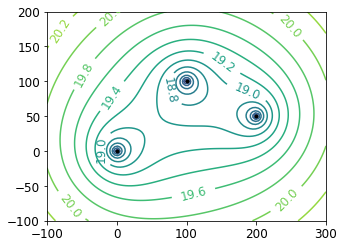

In [48]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(17, 21, 0.2))
plt.clabel(cs, fmt='%1.1f')
plt.plot([x0, x1, x2], [y0, y1, y2], 'k.');

In [49]:
# computed discharge of well 0
print(f'discharge of well 0: {w0.parameter:.0f} m^3/d')

discharge of well 0: 563 m^3/d


In [50]:
# print discharges of all wells:
for i, w in enumerate([w0, w1, w2]):
    print(f'dicharge of well {i} is {w.parameter:.0f} m^3/d')

dicharge of well 0 is 563 m^3/d
dicharge of well 1 is 546 m^3/d
dicharge of well 2 is 509 m^3/d


## Simulation of river segments with line-sinks$^*$
River segments may be simulated with line-sinks. A line-sink is a line element that takes out water uniformly along a line segment. The head is specified at the center of the line-sink and the discharge of the line-sink is computed such that the head at the center of the segment is equal to the specfied value (very similar to a `HeadWell`). Line-sinks with a specified head are implemented in the `HeadLineSink` class, which is imported first. Next, a model is built for an area bounded by two river branches. Each river branch is divided in a number of segments. The water levels at the centers of the segments are indicated in the figure below.

<img src="figs/aem_model.png" width="400px">

In [51]:
# parameters
T = 100 # transmissivity, m^2/d
# wells
x0, y0, Q0 = 500, 250, 100 # well 0, discharge in m^3/d
x1, y1, Q1 = 800, 500, 100 # well 1, discahrge in m^3/d
Q1 = 100 # discharge, m^3/d
# river segments, all in m
xls0 = [0, 100, 200, 400, 600, 800, 1000, 1100, 1200]
yls0 = [200, 200, 100, 100, 0, 0, 100, 300, 450]
hls0 = np.linspace(39, 40.4, 8)
xls1 = [0, 0, 200, 400, 600, 800, 1000, 1100, 1200]
yls1 = [200, 400, 600, 600, 700, 700, 750, 800, 850]
hls1 = np.linspace(39, 40.4, 8)
# reference point
xr, yr, hr = 0, 800, 39.5

In [52]:
from simple_aem import HeadLineSink

# analytic element model
ml = Model(T) # transmissivity, m^2/d
rf = Constant(ml, xr, yr, hr) # reference point
w0 = Well(ml, x0, y0, Q0) # well 0
w1 = Well(ml, x1, y1, Q1) # well 1
for i in range(len(hls0)):
    HeadLineSink(ml, xls0[i], yls0[i], xls0[i + 1], yls0[i + 1], hls0[i])
for i in range(len(hls1)):
    HeadLineSink(ml, xls1[i], yls1[i], xls1[i + 1], yls1[i + 1], hls1[i])

In [53]:
# solution
ml.solve()
xg, yg = np.meshgrid(np.linspace(-100, 1300, 100), np.linspace(-100, 900, 100))
h = ml.head(xg, yg)
print(f'min and max head: {h.min():.2f} m, {h.max():.2f} m')

min and max head: 38.95 m, 40.40 m


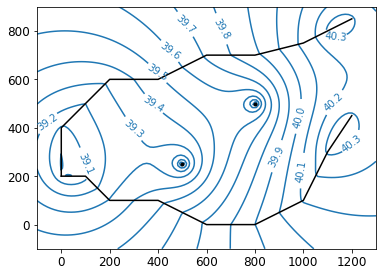

In [54]:
# contour plot
plt.subplot(111, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(38, 41, 0.1), colors='C0')
plt.clabel(cs, fmt='%1.1f', fontsize='smaller')
plt.plot(xls0, yls0, 'k')
plt.plot(xls1, yls1, 'k')
plt.plot([w0.zw.real, w1.zw.real], [w0.zw.imag, w1.zw.imag], 'k.');

Find more analytic solutions and their application in Python in [Bakker and Post, 2022, Analytical Groundwater Modeling](https://www.routledge.com/Analytical-Groundwater-Modeling-Theory-and-Applications-using-Python/Bakker-Post/p/book/9781138029392). 